<a href="https://colab.research.google.com/github/ravindranaithani/classification.ipynb/blob/main/oop2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset<br>
* target is "IncomeGroup"<br>
* random_state should be taken as 64 whereever applicable


# Q2: what is the shape of dataset

In [51]:
data = pd.read_csv('/content/income_grp_oppe2.csv')

In [ ]:
data.head()

In [ ]:
data.shape

(20000, 15)

In [ ]:
np.unique(data.astype(str).values.ravel())

In [ ]:
result_list = []
for col in data.columns:
    if data[col].dtype == 'O':  # Check if the column has object dtype (string)
        # Filter the DataFrame based on the condition
        filtered_data = data[data[col].str.contains('\?', na=False, regex=True)]

        # Count the occurrences in the filtered data
        count = filtered_data.shape[0]

        result_list.append((col, count))

print(result_list)


# Q3: Is there any missing value in datasets

A: No

In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [ ]:
(data.isin (['?'])).sum()

In [ ]:
data['native-country'].value_counts()

In [ ]:
data.occupation.value_counts()

In [ ]:
('workclass', 1146), ('education', 0), ('marital-status', 0), ('occupation', 1151), ('relationship', 0), ('race', 0), ('sex', 0), ('native-country', 349), ('IncomeGroup', 0)]

In [ ]:
data.applymap(lambda x: str(x).strip() == '?').sum()

In [ ]:
(1151/20000)*100

5.755

In [ ]:
data.workclass.value_counts()

In [ ]:
data['IncomeGroup'].str.contains('<=50k', case=False, na=False, regex=True).sum()

15199

In [ ]:
data.IncomeGroup.value_counts()

 <=50K    15199
 >50K      4801
Name: IncomeGroup, dtype: int64

In [ ]:
15199/

In [ ]:
(15199/20000)*100

75.995

In [ ]:
data.education.value_counts()

In [ ]:
data['education-num'].corr(data['capital-gain'])

0.12887128921263077

In [ ]:
data.corr()

In [3]:
data.replace(' ?',np.nan,inplace = True)

In [ ]:
data.applymap(lambda x: str(x).strip() == '?').sum()

In [ ]:
data.isna().sum()

In [ ]:
lst = data.columns
for i in lst:
  print(i,data[i].unique())

In [ ]:
data['age'].mean()

38.6782

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
col_to_impute = ['workclass','occupation','native-country']
data[col_to_impute]=imputer.fit_transform(data[col_to_impute])
data.isna().sum()

In [ ]:
data['occupation'].mode()

0     Exec-managerial
Name: occupation, dtype: object

In [ ]:
columns = data.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'IncomeGroup'],
      dtype='object')

In [ ]:
data.dtypes

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [52]:
X1 = data.select_dtypes(include=['number'])
X2= data.select_dtypes(include=['object'])
y= X2['IncomeGroup']
X2 = X2.drop(['IncomeGroup'],axis = 1)


In [53]:
X1.shape,X2.shape

((20000, 6), (20000, 8))

In [54]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [9]:
ss =StandardScaler()
ohe = OneHotEncoder(sparse = False)

In [56]:
X1=ss.fit_transform(X1)
X2=ohe.fit_transform(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
X1.shape, X2.shape,type(X1),type(X2)

((20000, 6), (20000, 102), numpy.ndarray, numpy.ndarray)

In [58]:
X = np.concatenate([X1,X2],axis=1)

In [59]:
X.shape

(20000, 108)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=64)

In [62]:
X_train.shape, y_train.shape,X_test.shape,y_train.shape

((16000, 108), (16000,), (4000, 108), (16000,))

In [ ]:
data = {'Column1': [' ?', 'value', ' ? ', '  ?', '  value'],
        'Column2': ['value ', 'value', '  ?', 'value  ', '  value  ']}
df = pd.DataFrame(data)
df

,Column1,Column2
0,?,value
1,value,value
2,?,?
3,?,value
4,value,value


In [ ]:
df.applymap(lambda X: str(X).strip()=='value').sum()

Column1    2
Column2    4
dtype: int64

In [ ]:
df['Column1'].apply(lambda X:str(X).strip()=='?').sum()

3

In [ ]:
df['Column1'][df['Column1']==' ?'].count()

1

In [ ]:
df['Column1'].value_counts()

 ?         1
value      1
 ?         1
  ?        1
  value    1
Name: Column1, dtype: int64

In [63]:
from sklearn.linear_model import Perceptron
import sklearn.metrics as skm

In [64]:
clf = Perceptron(fit_intercept= True,warm_start = False)

Calculate the Accuracy score for Training Dataset

In [65]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [66]:
skm.accuracy_score(y_test,y_pred)

0.76675

In [69]:
confusion = skm.confusion_matrix(y_test,y_pred)
confusion

array([[2504,  501],
       [ 432,  563]])

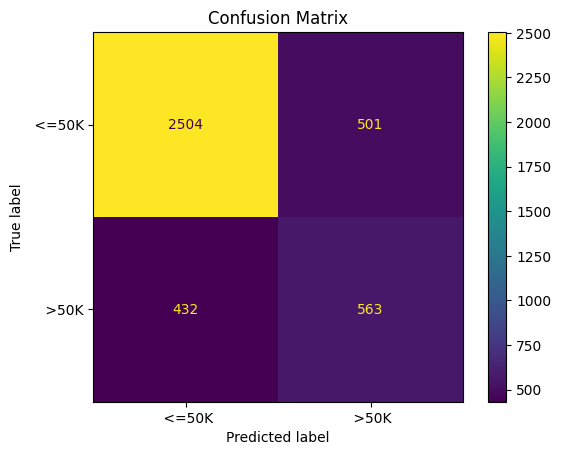

In [71]:
con_dis = skm.ConfusionMatrixDisplay(confusion,display_labels=clf.classes_)
con_dis.plot()
plt.title('Confusion Matrix')
plt.show()

Insastiate a new percptron model with<br>
1:fit intercept and early stopping

2: Warm Start to be false

What is the value of bias upto one decimal point

In [22]:
ptn = Perceptron(early_stopping = True,warm_start = False,fit_intercept=True)
ptn.fit(X_train,y_train)
ptn.intercept_

array([-6.])

# SGDClassifier<br>
Insantiate SGDClassifir with following parameters on training dataset

* log loss
*ridge regularisation
*Maximum number of passes over dataset is 10
*initial learning rate 0.01
*regularisation rate 0.001
*learning rate should not change during training
*random state 64 warm start false

In [23]:
from sklearn.linear_model import SGDClassifier

In [26]:
clf1 = SGDClassifier(loss='log',penalty='l2',alpha = 0.001,
                     learning_rate='constant',eta0=0.01,random_state=64,
                     max_iter = 10,warm_start=False)

In [ ]:
clf1.get_params()

In [29]:
clf1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=10, random_state=64)

In [32]:
y_pred = clf1.predict(X_test)
accu_score = skm.accuracy_score(y_test,y_pred)
print(f'Accuracy Score :{accu_score:.2f}')

Accuracy Score :0.85


# LogisticRegression
* sag as solver
*tolerance for stopping criteria le-3
*max_iter = 100

In [33]:
from sklearn.linear_model import LogisticRegression


In [36]:
lr = LogisticRegression(solver = 'sag',max_iter = 100,tol=1e-3,random_state=64)

In [37]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 64,
 'solver': 'sag',
 'tol': 0.001,
 'verbose': 0,
 'warm_start': False}

In [73]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=64, solver='sag', tol=0.001)

In [74]:
y_pred = lr.predict(X_test)
skm.recall_score(y_test,y_pred,average = 'macro')

0.7672112643082301

In [75]:
cm = skm.confusion_matrix(y_test,y_pred)
cm

array([[2817,  188],
       [ 401,  594]])

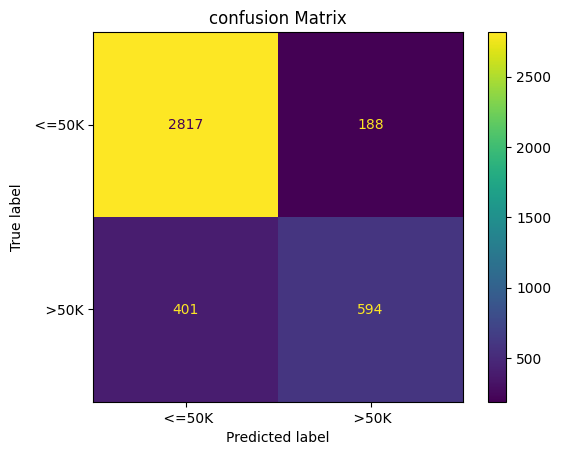

In [76]:
display =skm.ConfusionMatrixDisplay(cm,display_labels = lr.classes_)
display.plot()
plt.title('confusion Matrix')
plt.show()

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3005
        >50K       0.76      0.60      0.67       995

    accuracy                           0.85      4000
   macro avg       0.82      0.77      0.79      4000
weighted avg       0.85      0.85      0.85      4000



Q: use gridsearchcv with KNeighboursClassifier()being the estimator,accuracy as scoring parameter,cv value as 4 and cosider[1,3,5,7]as neighbours

For KNeighboursClassifier cosider

*metrics as minkowiski

* P value as 2

What is the best K value ?


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid ={'n_neighbors':[1,3,5,7],'metric':['minkowski'],'p':[2]}
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=4,scoring='accuracy')

In [84]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [1, 3, 5, 7],
                         'p': [2]},
             scoring='accuracy')

In [85]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'p': 2}

In [86]:
grid.best_score_

0.8335

Take DecisionTreeClassifier(random_state = 64) with GridSearchCV to hypertune the modelparameter with following<br>
* criterion as entropy or ginni
*splitter as random or best
*minimum number of samples per leave[2,4,6,8,10]
*maximum depth [3,4,5,6]
* cv= 4

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
param_grid ={'criterion':['entropy','gini'],
             'splitter':['random','best'],
             'min_samples_leaf':[2,4,6,8,10],
             'max_depth':[3,4,5,6]}
clfr= DecisionTreeClassifier(random_state = 64)
grid_s = GridSearchCV(clfr,param_grid,cv=4)

In [89]:
grid_s.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [90]:
grid_s.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [91]:
grid_s.best_score_

0.8501875000000001